In [ ]:
from pyhdf.SD import SD, SDC
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math

#  2) Cloud and Clean scenes over Ocean

#  a) RGB

In [ ]:
from pyhdf.SD import SD, SDC

file_name = 'MOD021KM.A2016268.1005.061.2017327230902.hdf'
file = SD(file_name, SDC.READ)

print(file.info())

(31, 58)


In [ ]:
datasets_dic = file.datasets()

for idx,sds in enumerate(datasets_dic.keys()):
    print(idx,sds)

0 Latitude
1 Longitude
2 EV_1KM_RefSB
3 EV_1KM_RefSB_Uncert_Indexes
4 EV_1KM_Emissive
5 EV_1KM_Emissive_Uncert_Indexes
6 EV_250_Aggr1km_RefSB
7 EV_250_Aggr1km_RefSB_Uncert_Indexes
8 EV_250_Aggr1km_RefSB_Samples_Used
9 EV_500_Aggr1km_RefSB
10 EV_500_Aggr1km_RefSB_Uncert_Indexes
11 EV_500_Aggr1km_RefSB_Samples_Used
12 Height
13 SensorZenith
14 SensorAzimuth
15 Range
16 SolarZenith
17 SolarAzimuth
18 gflags
19 EV_Band26
20 EV_Band26_Uncert_Indexes
21 Band_250M
22 Band_500M
23 Band_1KM_RefSB
24 Band_1KM_Emissive
25 Noise in Thermal Detectors
26 Change in relative responses of thermal detectors
27 DC Restore Change for Thermal Bands
28 DC Restore Change for Reflective 250m Bands
29 DC Restore Change for Reflective 500m Bands
30 DC Restore Change for Reflective 1km Bands


In [ ]:
SZA_get = file.select('SolarZenith') # select sds
VZA_get = file.select('SensorZenith') # select sds
SAA_get = file.select('SolarAzimuth') # select sds
VAA_get = file.select('SensorAzimuth') # select sds

SZA_data = SZA_get.get() # get sds data
VZA_data = VZA_get.get()
SAA_data = SAA_get.get()
VAA_data = VAA_get.get()

print(f"SZA = {np.mean(SZA_data[:,:]*SZA_get.attributes()['scale_factor'])}")
print(f"VZA = {np.mean(VZA_data[:,:]*VZA_get.attributes()['scale_factor'])}")
print(f"SAA = {np.mean(SAA_data[:,:]*SAA_get.attributes()['scale_factor'])}")
print(f"VAA = {np.mean(VAA_data[:,:]*VAA_get.attributes()['scale_factor'])}")

SZA = 25.372505878735257
VZA = 31.42017392012156
SAA = 63.9257417155054
VAA = 8.091310596194198


# Glint angle is 49.789 degrees

In [ ]:
sds_obj = file.select('EV_250_Aggr1km_RefSB') # select sds

data = sds_obj.get() # get sds data

In [ ]:
import pprint

pprint.pprint( sds_obj.attributes() )

{'_FillValue': 65535,
 'band_names': '1,2',
 'corrected_counts_offsets': [-0.0, -0.0],
 'corrected_counts_scales': [0.12497329711914062, 0.12497329711914062],
 'corrected_counts_units': 'counts',
 'long_name': 'Earth View 250M Aggregated 1km Reflective Solar Bands Scaled '
              'Integers',
 'radiance_offsets': [-0.0, -0.0],
 'radiance_scales': [0.028333760797977448, 0.010613624006509781],
 'radiance_units': 'Watts/m^2/micrometer/steradian',
 'reflectance_offsets': [-0.0, -0.0],
 'reflectance_scales': [5.575715113081969e-05, 3.38104109687265e-05],
 'reflectance_units': 'none',
 'units': 'none',
 'valid_range': [0, 32767]}


In [ ]:
sds_obj2 = file.select('EV_500_Aggr1km_RefSB') # select sds

data2 = sds_obj2.get() # get sds data

In [ ]:
import pprint

pprint.pprint( sds_obj2.attributes() )

{'_FillValue': 65535,
 'band_names': '3,4,5,6,7',
 'corrected_counts_offsets': [-0.0, -0.0, -0.0, -0.0, -0.0],
 'corrected_counts_scales': [0.12497329711914062,
                             0.12497329711914062,
                             0.12497329711914062,
                             0.12497329711914062,
                             0.12497329711914062],
 'corrected_counts_units': 'counts',
 'long_name': 'Earth View 500M Aggregated 1km Reflective Solar Bands Scaled '
              'Integers',
 'radiance_offsets': [-0.0, -0.0, -0.0, -0.0, -0.0],
 'radiance_scales': [0.037750016897916794,
                     0.027935344725847244,
                     0.006321446970105171,
                     0.0027928841300308704,
                     0.0008852750179357827],
 'radiance_units': 'Watts/m^2/micrometer/steradian',
 'reflectance_offsets': [-0.0, -0.0, -0.0, -0.0, -0.0],
 'reflectance_scales': [5.714617145713419e-05,
                        4.731997614726424e-05,
                       

In [ ]:
import numpy as np
for key, value in sds_obj.attributes().items():
    #print( key, value )
    if key == 'reflectance_offsets':
        add_offset = value
    if key == 'reflectance_scales':
        scale_factor = value

In [ ]:
for key2, value2 in sds_obj2.attributes().items():
    #print( key2, value2 )
    if key2 == 'reflectance_offsets':
        add_offset2 = value2
    if key2 == 'reflectance_scales':
        scale_factor2 = value2

In [ ]:
print(data.shape)

(2, 2040, 1354)


In [ ]:
print(data2.shape)

(5, 2040, 1354)


In [ ]:
#---------- RGB Matrix ----------#

factor = 1.0 # factor to increase the brightness
rgb = np.zeros((2040, 1354,3))

red = (data[0,:,:]-add_offset[0])*scale_factor[0]
green = (data2[1,:,:]-add_offset2[1])*scale_factor2[1]
NIR = (data[1,:,:]-add_offset[1])*scale_factor[1]
blue = (data2[0,:,:]-add_offset2[0])*scale_factor2[0]

rgb[:,:,0]= red[:,:]/factor
rgb[:,:,1]= green[:,:]/factor
rgb[:,:,2]= blue[:,:]/factor

rgb[ rgb > 1 ] = 1.0
rgb[ rgb < 0 ] = 0.0

Text(0.5, 1.0, 'RGB Image')

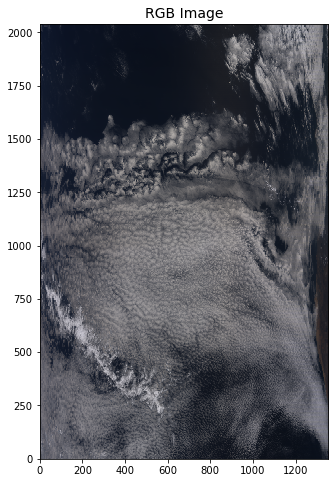

In [ ]:
#---------- Plot Image ----------#

fig = plt.figure(figsize=(10,8))
#%matplotlib tk
ax = fig.add_subplot(111)
img = plt.imshow(np.flipud(rgb), interpolation='nearest', origin='lower')
plt.title('RGB Image', fontsize=14)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


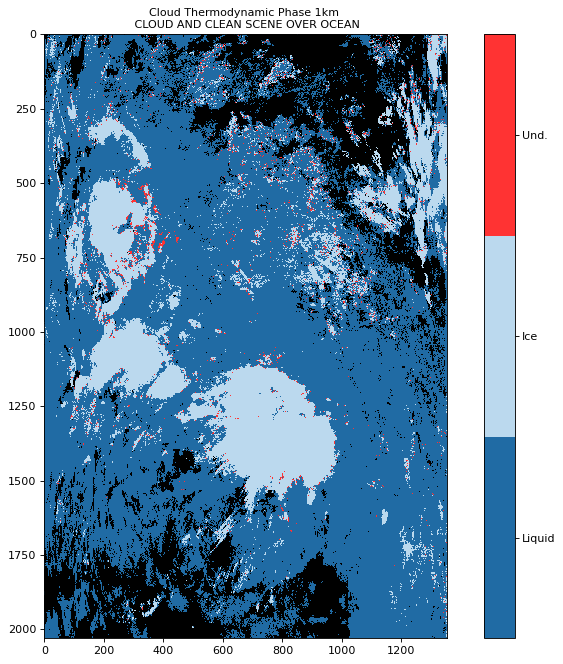

In [ ]:
from matplotlib.pyplot import figure
import matplotlib as mpl

modis_file = SD('MOD06_L2.A2016268.1000.061.2017328113132.hdf', SDC.READ)

data_selected_id = modis_file.select('Cloud_Phase_Optical_Properties')

data = data_selected_id.get()

figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

cmap =  [(0.0,0.0,0.0)] + [(32./255., 107./255., 164./255.)] + \
       [(187./255., 217./255., 238./255.)] + [(255./255, 51./255, 51./255.)]
cmap = mpl.colors.ListedColormap(cmap)

bounds = [-0.5, 1.5, 2.5, 3.5, 4.5]

norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

#img = plt.imshow(np.fliplr(data), cmap=cmap, norm=norm,
#              interpolation='none', origin='lower')


img = plt.imshow((data), cmap=cmap, norm=norm,
              interpolation='none')

cbar_bounds = [1.5, 2.5, 3.5, 4.5]
cbar_ticks = [2.0,3.0,4.0]
cbar_labels = ['Liquid','Ice','Und.']

cbar = plt.colorbar(img, cmap=cmap, norm=norm, boundaries=cbar_bounds, ticks=cbar_ticks)
cbar.ax.set_yticklabels(cbar_labels, fontsize=10)

plt.title('Cloud Thermodynamic Phase 1km \n CLOUD AND CLEAN SCENE OVER OCEAN', fontsize=10)

plt.savefig("modis_myd06_cloud_phase_optical_properties_python3_01.png", bbox_inches='tight')

plt.show()

#  b) Aerosol optical depth

In [ ]:
from pyhdf.SD import SD, SDC

file_name = 'MOD04_L2.A2016268.1005.061.2017328104820.hdf'
file = SD(file_name, SDC.READ)

print(file.info())

(72, 10)


In [ ]:
datasets_dic = file.datasets()

for idx,sds in enumerate(datasets_dic.keys()):
    print(idx,sds)

0 Longitude
1 Latitude
2 Scan_Start_Time
3 Solar_Zenith
4 Solar_Azimuth
5 Sensor_Zenith
6 Sensor_Azimuth
7 Scattering_Angle
8 Land_sea_Flag
9 Aerosol_Cldmask_Land_Ocean
10 Cloud_Pixel_Distance_Land_Ocean
11 Land_Ocean_Quality_Flag
12 Optical_Depth_Land_And_Ocean
13 Image_Optical_Depth_Land_And_Ocean
14 Average_Cloud_Pixel_Distance_Land_Ocean
15 Aerosol_Type_Land
16 Fitting_Error_Land
17 Surface_Reflectance_Land
18 Corrected_Optical_Depth_Land
19 Corrected_Optical_Depth_Land_wav2p1
20 Optical_Depth_Ratio_Small_Land
21 Number_Pixels_Used_Land
22 Mean_Reflectance_Land
23 STD_Reflectance_Land
24 Mass_Concentration_Land
25 Aerosol_Cloud_Fraction_Land
26 Quality_Assurance_Land
27 Solution_Index_Ocean_Small
28 Solution_Index_Ocean_Large
29 Effective_Optical_Depth_Best_Ocean
30 Effective_Optical_Depth_Average_Ocean
31 Optical_Depth_Small_Best_Ocean
32 Optical_Depth_Small_Average_Ocean
33 Optical_Depth_Large_Best_Ocean
34 Optical_Depth_Large_Average_Ocean
35 Mass_Concentration_Ocean
36 Aerosol_

In [ ]:
sds_obj = file.select('AOD_550_Dark_Target_Deep_Blue_Combined') # select sds

data3 = sds_obj.get() # get sds data

In [ ]:
import pprint

pprint.pprint( sds_obj.attributes() )

{'Cell_Across_Swath_Sampling': [1, 1354, 10],
 'Cell_Along_Swath_Sampling': [1, 2031, 10],
 'Geolocation_Pointer': 'Internal geolocation arrays',
 'Parameter_Type': 'Output',
 '_FillValue': -9999,
 'add_offset': 0.0,
 'long_name': 'Combined Dark Target, Deep Blue AOT at 0.55 micron for land and '
              'ocean.',
 'scale_factor': 0.0010000000474974513,
 'units': 'None',
 'valid_range': [-100, 5000]}


In [ ]:
import numpy as np
for key, value in sds_obj.attributes().items():
    #print( key, value )
    if key == 'add_offset':
        add_offset = value
    if key == 'scale_factor':
        scale_factor = value
    if key == '_FillValue':
        fill_value = value


In [ ]:
print(data3.shape)

(204, 135)


In [ ]:
data3[ data3 == fill_value ] = 0.0
AOD = (data3-add_offset)*scale_factor
#AOD[ AOD > 1 ] = 1.0
AOD[ AOD < 0 ] = 0.0

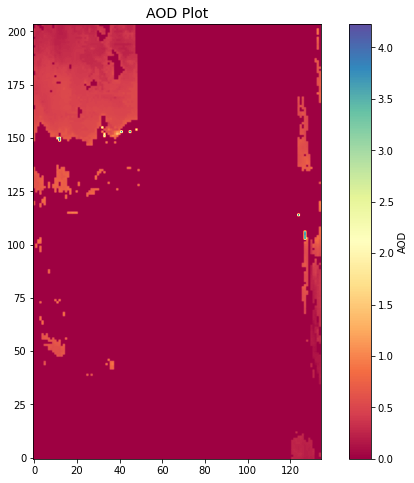

In [ ]:
#img = m.imshow(np.flipud(data), origin='lower',cmap="Spectral")
#cbar = m.colorbar(img,label="AOD")

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
img = plt.imshow(np.flipud(AOD), origin='lower',cmap="Spectral")
plt.title('AOD Plot', fontsize=14)
plt.colorbar(img,orientation='vertical',label='AOD',shrink=1)
plt.show()

#  b) Cloud optical depth

In [ ]:
from pyhdf.SD import SD, SDC

file_name = 'MOD06_L2.A2016268.1000.061.2017328113132.hdf'
file = SD(file_name, SDC.READ)

print(file.info())

(127, 14)


In [ ]:
datasets_dic = file.datasets()

for idx,sds in enumerate(datasets_dic.keys()):
    print(idx,sds)

0 Latitude
1 Longitude
2 Scan_Start_Time
3 Solar_Zenith
4 Solar_Zenith_Day
5 Solar_Zenith_Night
6 Solar_Azimuth
7 Solar_Azimuth_Day
8 Solar_Azimuth_Night
9 Sensor_Zenith
10 Sensor_Zenith_Day
11 Sensor_Zenith_Night
12 Sensor_Azimuth
13 Sensor_Azimuth_Day
14 Sensor_Azimuth_Night
15 Brightness_Temperature
16 Surface_Temperature
17 Surface_Pressure
18 Cloud_Height_Method
19 Cloud_Top_Height
20 Cloud_Top_Height_Nadir
21 Cloud_Top_Height_Nadir_Day
22 Cloud_Top_Height_Nadir_Night
23 Cloud_Top_Pressure
24 Cloud_Top_Pressure_Nadir
25 Cloud_Top_Pressure_Night
26 Cloud_Top_Pressure_Nadir_Night
27 Cloud_Top_Pressure_Day
28 Cloud_Top_Pressure_Nadir_Day
29 Cloud_Top_Temperature
30 Cloud_Top_Temperature_Nadir
31 Cloud_Top_Temperature_Night
32 Cloud_Top_Temperature_Nadir_Night
33 Cloud_Top_Temperature_Day
34 Cloud_Top_Temperature_Nadir_Day
35 Tropopause_Height
36 Cloud_Fraction
37 Cloud_Fraction_Nadir
38 Cloud_Fraction_Night
39 Cloud_Fraction_Nadir_Night
40 Cloud_Fraction_Day
41 Cloud_Fraction_Nadir_D

In [ ]:
sds_obj = file.select('Cloud_Optical_Thickness') # select sds

data4 = sds_obj.get() # get sds data

In [ ]:
import pprint

pprint.pprint( sds_obj.attributes() )

{'Cell_Across_Swath_Sampling': [1, 1354, 1],
 'Cell_Along_Swath_Sampling': [1, 2030, 1],
 'Geolocation_Pointer': 'External MODIS geolocation product',
 'Parameter_Type': 'Output',
 '_FillValue': -9999,
 'add_offset': 0.0,
 'long_name': 'Cloud Optical Thickness two-channel retrieval using band '
              '7(2.1um) and either band 1(0.65um), 2(0.86um), or 5(1.2um)  '
              '(specified in Quality_Assurance_1km)from best points: not '
              'failed in any way, not marked for clear sky restoral',
 'scale_factor': 0.009999999776482582,
 'units': 'none',
 'valid_range': [0, 10000]}


In [ ]:
import numpy as np
for key, value in sds_obj.attributes().items():
    #print( key, value )
    if key == 'add_offset':
        add_offset = value
    if key == 'scale_factor':
        scale_factor = value
    if key == '_FillValue':
        fill_value = value


In [ ]:
print(data4.shape)

(2030, 1354)


In [ ]:
data4[ data4 == fill_value ] = 0.0
COD = (data4-add_offset)*scale_factor
#COD[ COD > 1 ] = 1.0
COD[ COD < 0 ] = 0.0

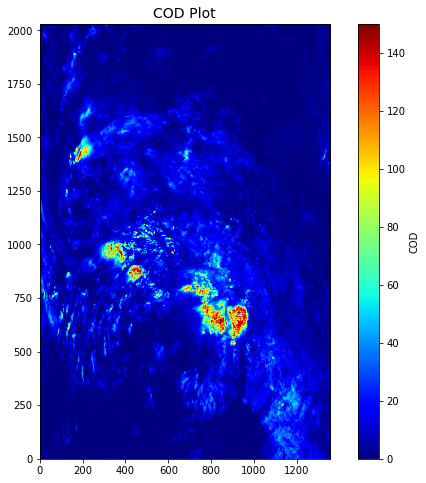

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
#img = plt.imshow(np.flipud(COD), origin='lower',cmap="Spectral")
img = plt.imshow(np.flipud(COD), origin='lower',cmap="jet")
plt.title('COD Plot', fontsize=14)
plt.colorbar(img,orientation='vertical',label='COD',shrink=1)
plt.show()

In [ ]:
sds_obj = file.select('Cloud_Effective_Radius') # select sds

data5 = sds_obj.get() # get sds data

In [ ]:
import pprint

pprint.pprint( sds_obj.attributes() )

{'Cell_Across_Swath_Sampling': [1, 1354, 1],
 'Cell_Along_Swath_Sampling': [1, 2030, 1],
 'Geolocation_Pointer': 'External MODIS geolocation product',
 'Parameter_Type': 'Output',
 '_FillValue': -9999,
 'add_offset': 0.0,
 'long_name': 'Cloud Particle Effective Radius two-channel retrieval using '
              'band 7(2.1um) and either band 1(0.65um), 2(0.86um), or '
              '5(1.2um)  (specified in Quality_Assurance_1km)from best points: '
              'not failed in any way, not marked for clear sky restoral',
 'scale_factor': 0.009999999776482582,
 'units': 'micron',
 'valid_range': [0, 10000]}


In [ ]:
import numpy as np
for key, value in sds_obj.attributes().items():
    #print( key, value )
    if key == 'add_offset':
        add_offset = value
    if key == 'scale_factor':
        scale_factor = value
    if key == '_FillValue':
        fill_value = value

In [ ]:
print(data5.shape)

(2030, 1354)


In [ ]:
data5[ data5 == fill_value ] = 0.0
CER = (data5-add_offset)*scale_factor
#CER[ CER > 1 ] = 1.0
CER[ CER < 0 ] = 0.0

In [ ]:
#Cloud optical depth computation

a1,b1,c1,d1=510, 540, 720, 780 #(Cloud1)
a2,b2,c2,d2=800, 830, 680, 740 #(Cloud2)
a3,b3,c3,d3=920, 980, 250, 400 #(Cloud3)
a4,b4,c4,d4=1350, 1380, 220, 280 #(Cloud4)

COD1 = np.mean(COD[a1:b1,c1:d1])
COD2 = np.mean(COD[a2:b2,c2:d2])
COD3 = np.mean(COD[a3:b3,c3:d3])
COD4 = np.mean(COD[a4:b4,c4:d4])

print(f"COD (Cloud1) = {COD1}")
print(f"COD (Cloud2) = {COD2}")
print(f"COD (Cloud3) = {COD3}")
print(f"COD (Cloud4) = {COD4}")

COD (Cloud1) = 15.521594097509773
COD (Cloud2) = 7.682183161623155
COD (Cloud3) = 9.493750898909237
COD (Cloud4) = 5.359222102434271


In [ ]:
#Cloud effective radius computation

a1,b1,c1,d1=510, 540, 720, 780 #(Cloud1)
a2,b2,c2,d2=800, 830, 680, 740 #(Cloud2)
a3,b3,c3,d3=920, 980, 250, 400 #(Cloud3)
a4,b4,c4,d4=1350, 1380, 220, 280 #(Cloud4)

CER1 = np.mean(CER[a1:b1,c1:d1])
CER2 = np.mean(CER[a2:b2,c2:d2])
CER3 = np.mean(CER[a3:b3,c3:d3])
CER4 = np.mean(CER[a4:b4,c4:d4])

print(f"CER (Cloud1) = {CER1}")
print(f"CER (Cloud2) = {CER2}")
print(f"CER (Cloud3) = {CER3}")
print(f"CER (Cloud4) = {CER4}")

CER (Cloud1) = 16.8643662897187
CER (Cloud2) = 16.15217186119304
CER (Cloud3) = 12.78526860311586
CER (Cloud4) = 11.087394196621867


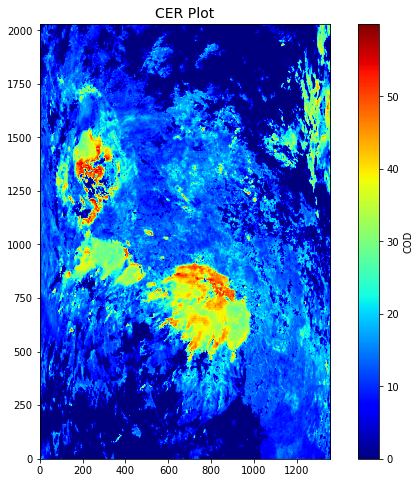

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
#img = plt.imshow(np.flipud(COD), origin='lower',cmap="Spectral")
img = plt.imshow(np.flipud(CER), origin='lower',cmap="jet")
plt.title('CER Plot', fontsize=14)
plt.colorbar(img,orientation='vertical',label='COD',shrink=1)
plt.show()

In [ ]:
#Minimum and Maximum COD
AOD_min = (AOD[:,:]).min()
AOD_max = (AOD[:,:]).max()
print(f"The minimum AOD = {AOD_min}")
print(f"The maximum AOD = {AOD_max}")

The minimum AOD = 0.0
The maximum AOD = 4.229000200866722


In [ ]:
#Minimum and Maximum COD
COD_min = (COD[:,:]).min()
COD_max = (COD[:,:]).max()
print(f"The minimum COD = {COD_min}")
print(f"The maximum COD = {COD_max}")

The minimum COD = 0.0
The maximum COD = 149.99999664723873


In [ ]:
#Minimum and Maximum CER
CER_min = (CER[:,:]).min()
CER_max = (CER[:,:]).max()
print(f"The minimum CER = {CER_min}")
print(f"The maximum CER = {CER_max}")

The minimum CER = 0.0
The maximum CER = 59.99999865889549
